In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv', sep=";")

##### Initial review

In [3]:
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
red_wine_data.shape

(1599, 12)

In [5]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2). 
#### There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
#### Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

###### Target Variable:
###### The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

###### Here quality is the target variable as we're trying to know which of the two types of wines have better quality.

In [7]:
red_wine_data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Observations:
##### Few key insights just by looking at the target variable are as follows:
##### Target variable/Dependent variable is discrete and categorical in nature.
##### “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
##### 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

In [8]:
red_wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Observations:
##### This tells us the vote count of each quality score in descending order.
##### “quality” has most values concentrated in the categories 5, 6 and 7.
##### Only a few observations made for the categories 3 & 8.

## Input Variables:
###### One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.
###### In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'.
###### All of these will help us predict the quality of the wine.
###### After loading the data, it is important to examine the data. It is usually not recommended to directly throw all the data into the model without understanding the data. This step always helps in improving our model.

In [9]:
red_wine_data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid',
                     'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 
                     'total sulfur dioxide':'total_sulfur_dioxide'},
                    inplace=True)

In [10]:
red_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Observation
##### The data has only float and integer values.
##### There are no missing values

In [12]:
duplicate_entries = red_wine_data[red_wine_data.duplicated()]
duplicate_entries

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

## Observations:
##### There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

### ****Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
y = red_wine_data.quality    ###set quality as target variable
x = red_wine_data.drop('quality',axis=1)  ### all columns except quality are input variables

In [15]:
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

### Observations:
###### The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
###### The attributes 'density' and 'pH' are quite normally distributed.
###### Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

<AxesSubplot: >

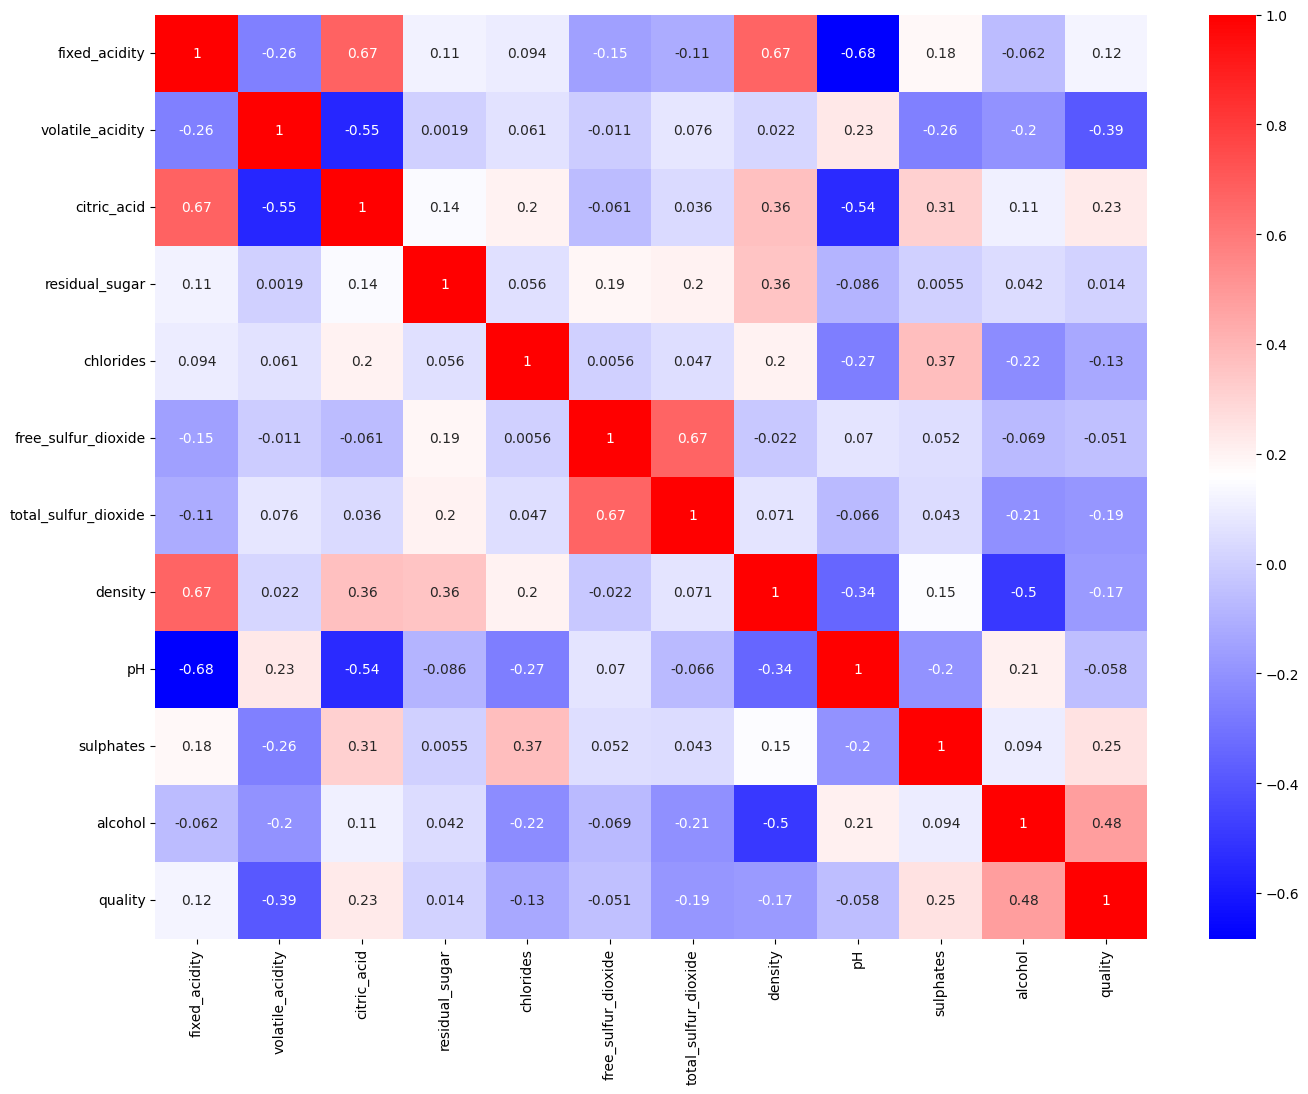

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)


### Observations:
##### Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.
##### There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
##### There is a relatively high negative correlation between fixed_acidity and pH.
##### Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
##### citric acid & volatile acidity have negative correlation.
##### free sulphur dioxide & total sulphur dioxide have positive correlation.

<AxesSubplot: xlabel='quality', ylabel='count'>

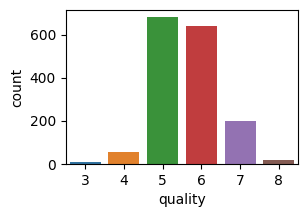

In [22]:
plt.figure(figsize=(3,2))
sns.countplot(data = red_wine_data, x='quality')

In [ ]:
# Needs to be checked

#plt.figure(figsize=(12,16))
#sns.pairplot(red_wine_data)

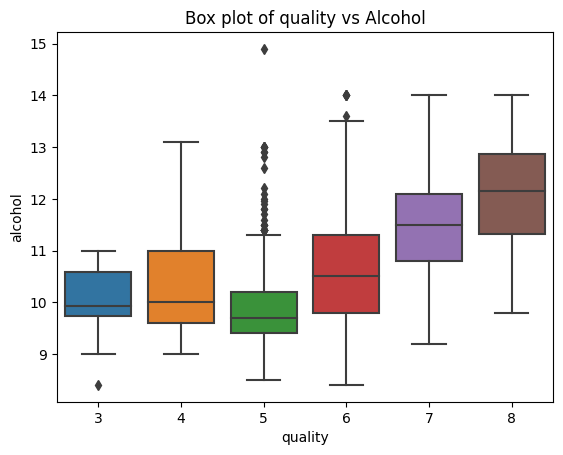

In [38]:
sns.boxplot(x=red_wine_data.quality, y=red_wine_data.alcohol)
plt.title('Box plot of quality vs Alcohol')
plt.show()

## Observation:
###### The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
###### Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.